# **CHECKPOINT 02 (Parte 01): Modelos com Redes Neurais com Keras**

## Disciplina:  Disruptive Architectures: IOT, IOB e GENERATIVE AI

## Turmas: 2TDSP (2o semestre de 2024)

## Professor: André Tritiack

## Pontuação Máxima: 4.00 pontos

## INSIRA NESSA CÉLULA O NOME E O RM DOS INTEGRANTES DO GRUPO

``` José Ribeiro dos Santos Neto ``` RM: 553844
``` Vitor Cruz dos Santos ``` RM: 553621
``` Keven Ike Pereira da Silva ``` RM: 553215
``` Luiz Otávio Leitão Silva ``` RM: 553542









# **Introdução**

Durante o semestre, estudamos o uso de algoritmos de **Aprendizado de Máquina Supervisionado**.

- Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

- Máquina de Vetor Suporte (SVM)

https://scikit-learn.org/stable/modules/svm.html#classification

- Árvore de Decisão (Decision Tree)

https://scikit-learn.org/stable/modules/tree.html

- Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações.

Nos exercícios a seguir, você e seu grupo receberão conjuntos de dados e precisarão aplicar duas dessas técnicas em cada exercício, utilizando como métrica a acurácia.

Em seguida, utilizando a biblioteca Keras, crie modelos de Redes Neurais para classificação e compare os resultados.

Altere o número de neurônios, a quantidade de camadas e as funções de ativação para comparar os resultados.

Use o exemplo demonstrado em aula para criar sua solução.

Importante: Somente serão aceitos arquivos .ipynb comentados, com justificativas e conclusões sobre as implementações

----------------------
# **QUESTÃO 01**

## **Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral**

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL).

O dataset foi disponibilizado em um arquivo .csv, em anexo da tarefa.

Maiores informações disponíveis em https://www.openml.org/d/1523

# Vamos realizar a instalação das bibliotecas e iremos utilizar: 

In [2]:
! pip install -r requirements.txt

Nesta etapa, são importadas todas as bibliotecas necessárias para análise de dados, treinamento de modelos de machine learning e visualização.

- **pandas** e **numpy**: para manipulação e análise de dados.
- **scikit-learn**: para pré-processamento e construção dos modelos KNN e Regressão Logística.
- **torch**: para criação e treinamento de redes neurais.
- **plotly** e **seaborn**: para visualizações interativas e análise exploratória de dados.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import plotly.express as px

Aqui realizamos a leitura do arquivo CSV contendo os dados. Em seguida, usamos `head()` para exibir as primeiras 5 linhas do dataframe, garantindo que os dados foram carregados corretamente. Também verificamos se há valores ausentes com `isnull().sum()`.


In [4]:
df = pd.read_csv("BD\questao_01.csv")
print(df.head())

   Unnamed: 0         V1         V2         V3         V4          V5  \
0           0  63.027818  22.552586  39.609117  40.475232   98.672917   
1           1  39.056951  10.060991  25.015378  28.995960  114.405425   
2           2  68.832021  22.218482  50.092194  46.613539  105.985136   
3           3  69.297008  24.652878  44.311238  44.644130  101.868495   
4           4  49.712859   9.652075  28.317406  40.060784  108.168725   

          V6   diagnostic  
0  -0.254400  Disk Hernia  
1   4.564259  Disk Hernia  
2  -3.530317  Disk Hernia  
3  11.211523  Disk Hernia  
4   7.918501  Disk Hernia  


In [5]:
print(df.isnull().sum())

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
diagnostic    0
dtype: int64


Nesta etapa, removemos a coluna 'Unnamed: 0' que foi adicionada automaticamente durante o processo de leitura do CSV. A coluna `diagnostic` é convertida para valores numéricos usando o método `astype('category').cat.codes`, facilitando o treinamento dos modelos de machine learning.


In [6]:
df = df.drop('Unnamed: 0', axis=1)

df['diagnostic'] = df['diagnostic'].astype('category').cat.codes

print(df.head())


          V1         V2         V3         V4          V5         V6  \
0  63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985136  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

   diagnostic  
0           0  
1           0  
2           0  
3           0  
4           0  


Aqui, normalizamos todas as colunas de características (exceto `diagnostic`) usando o `StandardScaler` para garantir que as variáveis tenham a mesma escala, o que é importante para algoritmos como KNN.


In [7]:
scaler = StandardScaler()

df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

print(df.head())

         V1        V2        V3        V4        V5        V6  diagnostic
0  0.147086  0.501369 -0.665177 -0.184950 -1.447647 -0.708059           0
1 -1.245864 -0.748769 -1.453001 -1.041521 -0.264385 -0.579556           0
2  0.484370  0.467932 -0.099262  0.273083 -0.897686 -0.795421           0
3  0.511390  0.711562 -0.411339  0.126128 -1.207303 -0.402288           0
4 -0.626648 -0.789693 -1.274745 -0.215876 -0.733455 -0.490106           0


Os dados são divididos em dois conjuntos: treino e teste. Utilizamos 70% dos dados para treino e 30% para teste. As variáveis preditoras (`X`) e a variável alvo (`y`) são separadas para uso nos modelos de machine learning.


In [8]:
X = df.drop('diagnostic', axis=1)
y = df['diagnostic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

Dimensões do conjunto de treino: (217, 6)
Dimensões do conjunto de teste: (93, 6)


Nesta etapa, treinamos o modelo KNN (K-Nearest Neighbors) com 5 vizinhos. Após o treinamento, realizamos previsões no conjunto de teste e calculamos a acurácia do modelo.


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do KNN: {accuracy_knn * 100:.2f}%")

Acurácia do KNN: 75.27%


Aqui, treinamos um modelo de Regressão Logística para comparar com o KNN. Assim como anteriormente, fazemos as previsões no conjunto de teste e calculamos a acurácia do modelo.


In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Acurácia da Regressão Logística: {accuracy_logreg * 100:.2f}%")


Acurácia da Regressão Logística: 82.80%


Transformamos os dados em tensores para serem usados com o PyTorch, framework utilizado para redes neurais. Também dividimos os dados de entrada (`X`) e a variável alvo (`y`) entre treino e teste.


In [11]:
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6']].values
y = df['diagnostic'].values

y = np.where(y == 'Disk Hernia', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

print(f'Dimensões do conjunto de treino: {X_train_tensor.shape}, {y_train_tensor.shape}')
print(f'Dimensões do conjunto de teste: {X_test_tensor.shape}, {y_test_tensor.shape}')

Dimensões do conjunto de treino: torch.Size([217, 6]), torch.Size([217, 1])
Dimensões do conjunto de teste: torch.Size([93, 6]), torch.Size([93, 1])


Definimos uma rede neural simples com uma camada oculta de 10 neurônios. A função de ativação ReLU é usada na camada oculta, e a função sigmoide é usada na camada de saída para lidar com o problema de classificação binária.


In [12]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)  
        self.fc2 = nn.Linear(10, 1)            

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.sigmoid(self.fc2(x))  
        return x

input_size = X_train_tensor.shape[1]  
model = SimpleNN(input_size)

criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)  


Treinamos a rede neural por 100 épocas usando a função de perda binária (`BCELoss`) e o otimizador Adam. Durante o treinamento, o erro é calculado e os pesos são ajustados a cada época.


In [13]:
num_epochs = 100  

for epoch in range(num_epochs):
    model.train() 
    optimizer.zero_grad()  
    outputs = model(X_train_tensor).squeeze()  
    loss = criterion(outputs, y_train_tensor.view(-1))  
    loss.backward()  
    optimizer.step() 
    
    if (epoch + 1) % 10 == 0:  
        print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}')


Época [10/100], Perda: 0.4123
Época [20/100], Perda: 0.2835
Época [30/100], Perda: 0.1754
Época [40/100], Perda: 0.0901
Época [50/100], Perda: 0.0422
Época [60/100], Perda: 0.0216
Época [70/100], Perda: 0.0130
Época [80/100], Perda: 0.0089
Época [90/100], Perda: 0.0067
Época [100/100], Perda: 0.0053


Com a rede neural treinada, avaliamos seu desempenho no conjunto de teste e calculamos a acurácia final do modelo.


In [14]:
model.eval()  
with torch.no_grad():  
    outputs_test = model(X_test_tensor).squeeze()  
    predictions = (outputs_test >= 0.5).float()  

accuracy = (predictions == y_test_tensor.view(-1)).float().mean()  
print(f'Acurácia do modelo no conjunto de teste: {accuracy.item() * 100:.2f}%')


Acurácia do modelo no conjunto de teste: 100.00%


Aqui, utilizamos várias técnicas de visualização para explorar a relação entre as variáveis do dataset, como histogramas, boxplots, gráficos de dispersão e matrizes de correlação.


In [15]:
for column in df.columns[:-1]:  
    fig = px.histogram(df, x=column, title=f'Distribuição de {column}')
    fig.show()

In [16]:
fig = px.scatter(df, x='V1', y='V2', color='diagnostic', title='Dispersão entre V1 e V2')
fig.show()


In [17]:
fig = px.box(df, x='diagnostic', y='V1', title='Comparação de V1 por Diagnóstico')
fig.show()


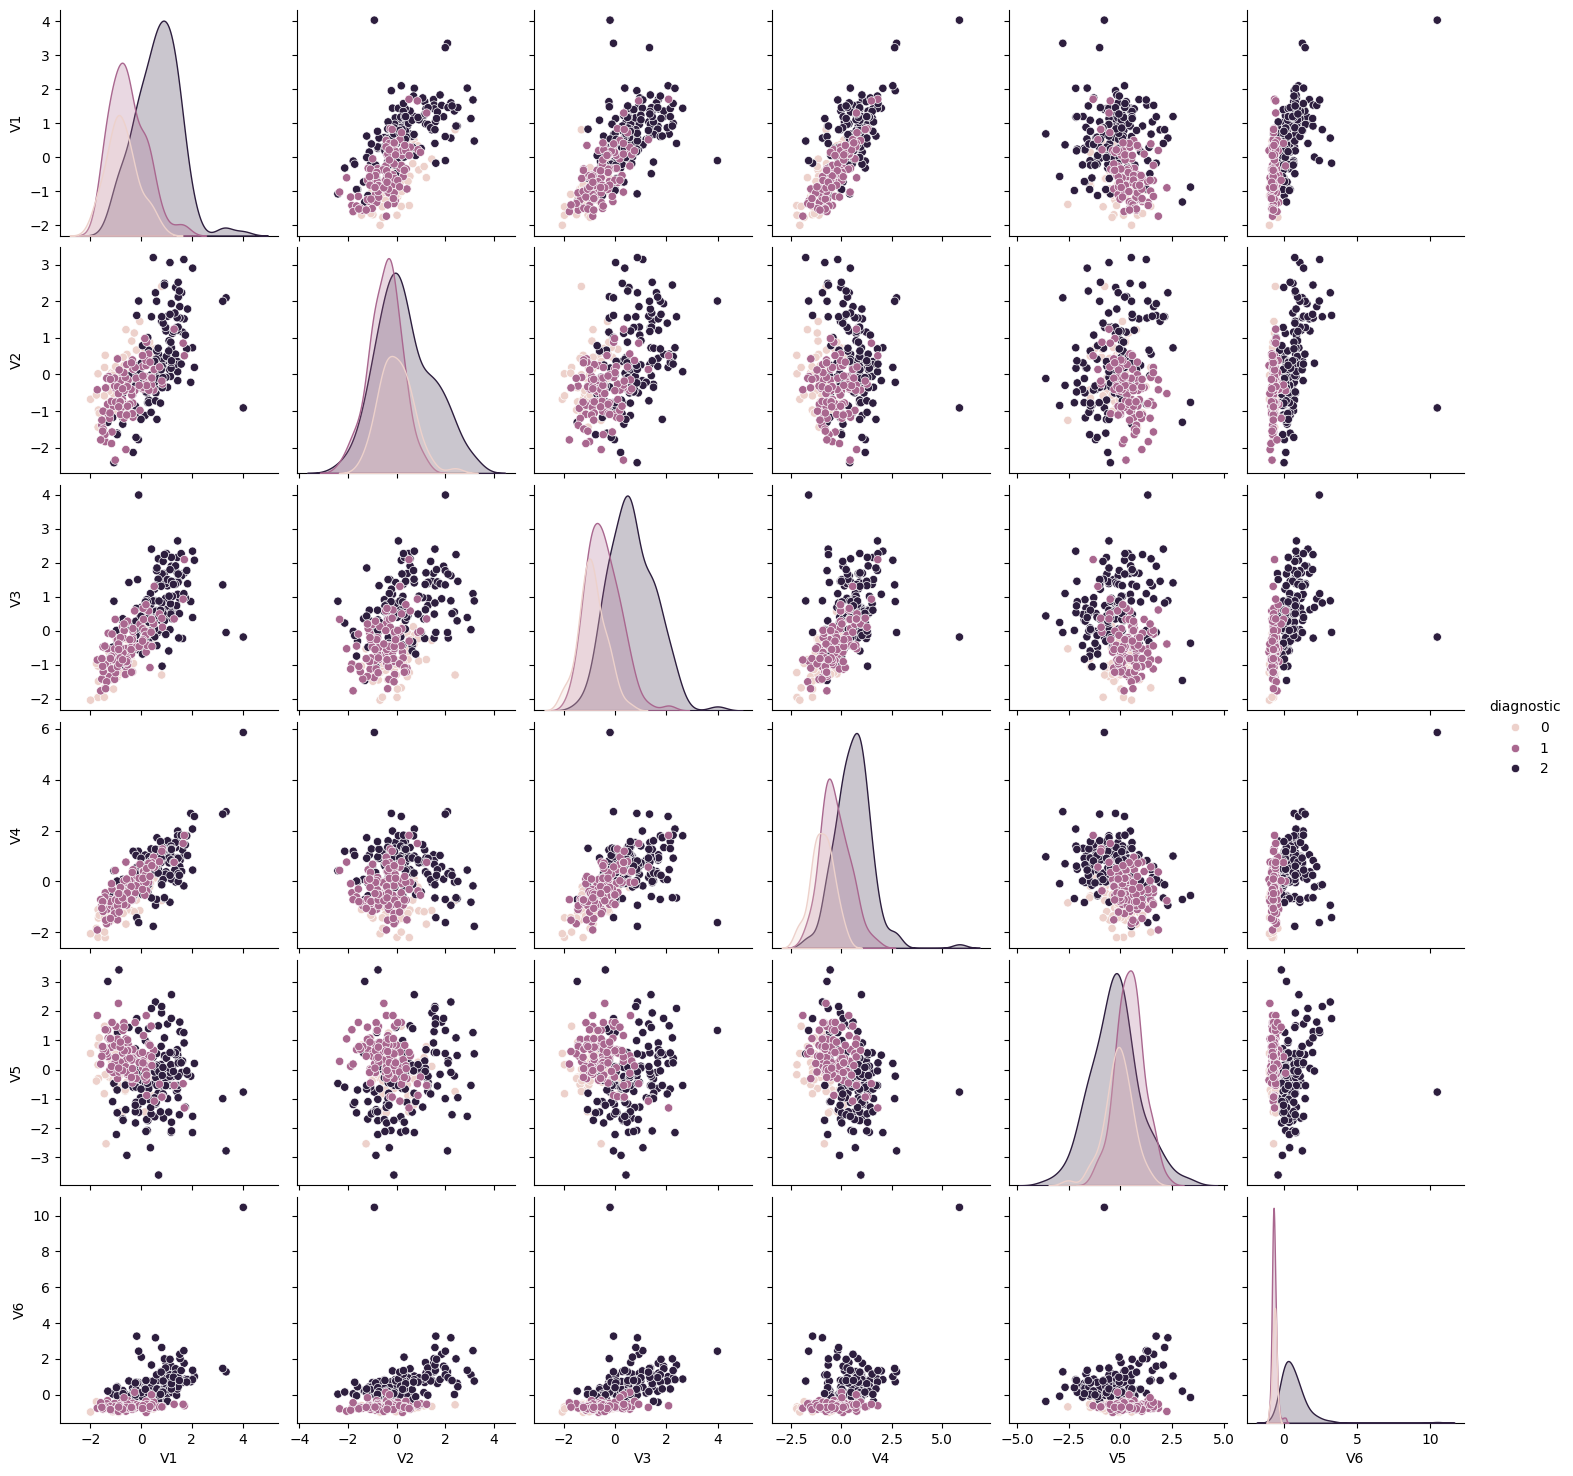

In [18]:
sns.pairplot(df, hue='diagnostic')
plt.show()

In [19]:
fig_pie = px.pie(df, names='diagnostic', title='Proporções de Diagnósticos')
fig_pie.show()

In [20]:
fig_matrix = px.scatter_matrix(df, dimensions=['V1', 'V2', 'V3', 'V4', 'V5', 'V6'],
                                color='diagnostic',
                                title='Matriz de Dispersão das Variáveis',
                                labels={'diagnostic': 'Diagnóstico'})
fig_matrix.show()


QUESTÃO 02
Diagnóstico médico: Diabetes no povo Pima
Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

Faça o download do dataset:

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Análise e Modelagem de Dados de Diabetes

## 1. Importação de Bibliotecas
Neste primeiro passo, importamos as bibliotecas necessárias para a análise e modelagem dos dados.


In [21]:
! pip install -r requirements.txt

# Análise e Modelagem de Dados de Diabetes

## 1. Importação de Bibliotecas
Neste primeiro passo, importamos as bibliotecas necessárias para a análise e modelagem dos dados.


In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Carregamento e Pré-processamento de Dados
Aqui, carregamos o conjunto de dados de diabetes e exibimos as primeiras linhas e estatísticas descritivas para ter uma ideia da distribuição dos dados.


In [24]:
df_diabetes = pd.read_csv("BD\diabetes.csv")
print(df_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [25]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## 3. Separar Características (X) e Rótulo (y)
Neste passo, separamos as características (variáveis independentes) do rótulo (variável dependente).


In [26]:
X = df_diabetes.drop('Outcome', axis=1).values
y = df_diabetes['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1) 

In [27]:
class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(8, 16)  
        self.fc2 = nn.Linear(16, 8)   
        self.fc3 = nn.Linear(8, 1)     

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = torch.sigmoid(self.fc3(x))  
        return x


In [28]:
model = DiabetesNN()

criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

In [29]:
for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = model(X_train_tensor).squeeze()  
    loss = criterion(outputs, y_train_tensor.squeeze())  
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}')


Época [10/100], Perda: 0.6554
Época [20/100], Perda: 0.6480
Época [30/100], Perda: 0.6398
Época [40/100], Perda: 0.6299
Época [50/100], Perda: 0.6182
Época [60/100], Perda: 0.6040
Época [70/100], Perda: 0.5873
Época [80/100], Perda: 0.5683
Época [90/100], Perda: 0.5485
Época [100/100], Perda: 0.5297


In [30]:
with torch.no_grad():
    model.eval()  
    outputs = model(X_test_tensor).squeeze()
    predicted = (outputs > 0.5).float()  

    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')


Acurácia do modelo no conjunto de teste: 0.56


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('BD\diabetes.csv')

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k = 5  
knn = KNeighborsClassifier(n_neighbors=k)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo KNN no conjunto de teste: {accuracy:.2f}')

print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia do modelo KNN no conjunto de teste: 0.69
Matriz de Confusão:
 [[79 20]
 [28 27]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



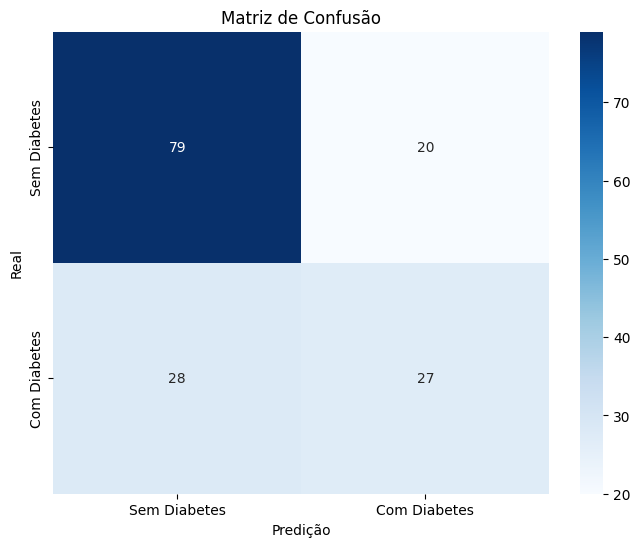

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Diabetes', 'Com Diabetes'], 
            yticklabels=['Sem Diabetes', 'Com Diabetes'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [34]:
X = df_diabetes.drop('Outcome', axis=1).values
y = df_diabetes['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)  # Alterar a dimensão
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)


class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(8, 16)  
        self.fc2 = nn.Linear(16, 8)   
        self.fc3 = nn.Linear(8, 1)    

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  
        return x

model = DiabetesNN()

criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()  
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  
    
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  

    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Perda: {loss.item():.4f}')

model.eval()  
with torch.no_grad():  
    y_pred = model(X_test_tensor).round()  

accuracy = (y_pred.eq(y_test_tensor).sum() / float(y_test_tensor.size(0))).item()
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')


Época [10/100], Perda: 0.5915
Época [20/100], Perda: 0.4772
Época [30/100], Perda: 0.4408
Época [40/100], Perda: 0.4233
Época [50/100], Perda: 0.4105
Época [60/100], Perda: 0.4009
Época [70/100], Perda: 0.3916
Época [80/100], Perda: 0.3811
Época [90/100], Perda: 0.3708
Época [100/100], Perda: 0.3603
Acurácia do modelo no conjunto de teste: 0.75
